# Giữa kỳ

## THÔNG TIN

- Họ tên: Nguyễn Thị Nga
- STT: 39
- MSV : 21130791

Bài thi GK

In [42]:
# import library...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1: (1 điểm)

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [43]:
df = pd.read_csv('brfss_2000.csv')
df.shape

(20000, 9)

### Câu 2 (2 điểm)

a, (1 điểm) Tính tỷ lệ nam nữ

b, (1 điểm) Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [50]:
# a, (1 điểm) Tính tỷ lệ nam nữ
gender_ratio = df['gender'].value_counts()

male_ratio = gender_ratio['m'] / df.shape[0]
female_ratio = gender_ratio['f']/df.shape[0]
male_female_ratio = gender_ratio['m']/gender_ratio['f']

print("Tỉ lệ nam:",male_ratio)
print("Tỉ lệ nữ:",female_ratio)
print("Tỉ lệ nam/nữ:", male_female_ratio)


Tỉ lệ nam: 0.47845
Tỉ lệ nữ: 0.52155
Tỉ lệ nam/nữ: 0.9173617102866456


In [45]:
# b, (1 điểm) Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?
active_individuals = df[df['exerany'] == 1]
poor_health_ratio = len(active_individuals[active_individuals['genhlth'] == 'poor']) / len(active_individuals)
poor_health_ratio


0.01964597022931474

### Câu 3: (2 điểm)

a, (1 điểm) Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, (1 điểm) Tính tỷ lệ những người muốn giảm cân.

In [46]:
# a, (1 điểm) Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.
df['height_cm'] = df['height'] * 2.54
df['weight_kg'] = df['weight'] * 0.45359237

print(df['height_cm'])
print(df['weight_kg'])

0        177.80
1        162.56
2        152.40
3        167.64
4        154.94
          ...  
19995    167.64
19996    185.42
19997    165.10
19998    170.18
19999    175.26
Name: height_cm, Length: 20000, dtype: float64
0        79.378665
1        56.699046
2        47.627199
3        59.874193
4        68.038855
           ...    
19995    97.522360
19996    90.718474
19997    97.975952
19998    74.842741
19999    77.110703
Name: weight_kg, Length: 20000, dtype: float64


In [47]:
# b, (1 điểm) Tính tỷ lệ những người muốn giảm cân.
ty_le_muon_giam_can = len(active_individuals[active_individuals['wtdesire'] < active_individuals['weight']]) / len(active_individuals)
ty_le_muon_giam_can

0.6383934558133297

### Câu 4: (2 điểm)

a, (1 điểm) Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, (1 điểm) Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

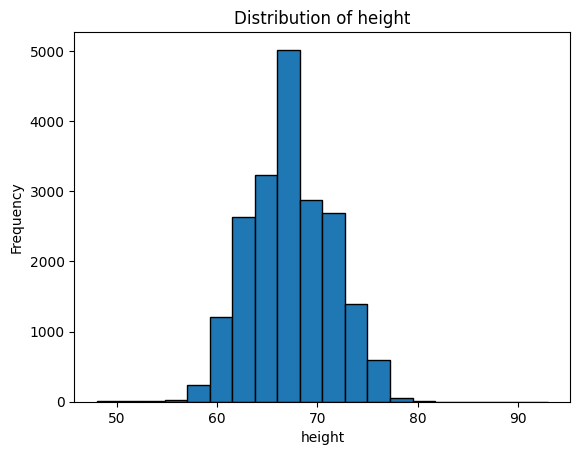

In [48]:
import scipy.stats as stats
plt.hist(df['height'], bins=20, edgecolor='black')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.title(f'Distribution of height')
plt.show()


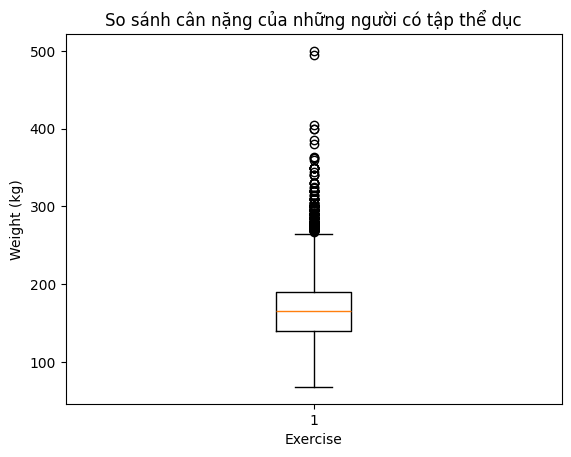

In [52]:
# b, (1 điểm) Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục
plt.boxplot(active_individuals['weight'])
plt.xlabel('Exercise')
plt.ylabel('Weight (kg)')
plt.title('So sánh cân nặng của những người có tập thể dục')
plt.show()


---